
# Section 2: Exploratory Data Analysis


The following code will:


1. Create comprehensive analyses for both Category and Business dimensions

2. Generate visualizations showing the top 10 performers in each dimension

3. Calculate and display:
     Total Quantities
     Total Values
     Percentage Contributions

4. Provide key insights about concentration of sales

The visualizations will help identify:
     Which categories and businesses are the top performers
     The distribution of sales across different categories and businesses
     Any potential concentration risks

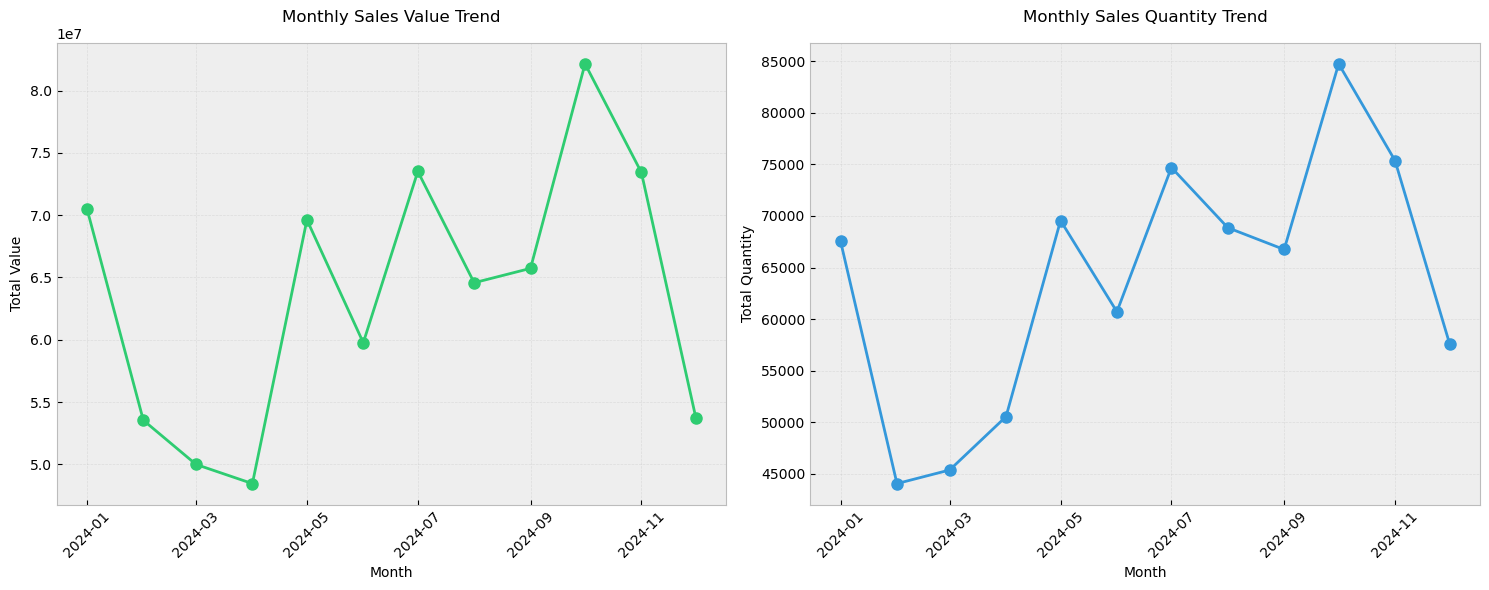

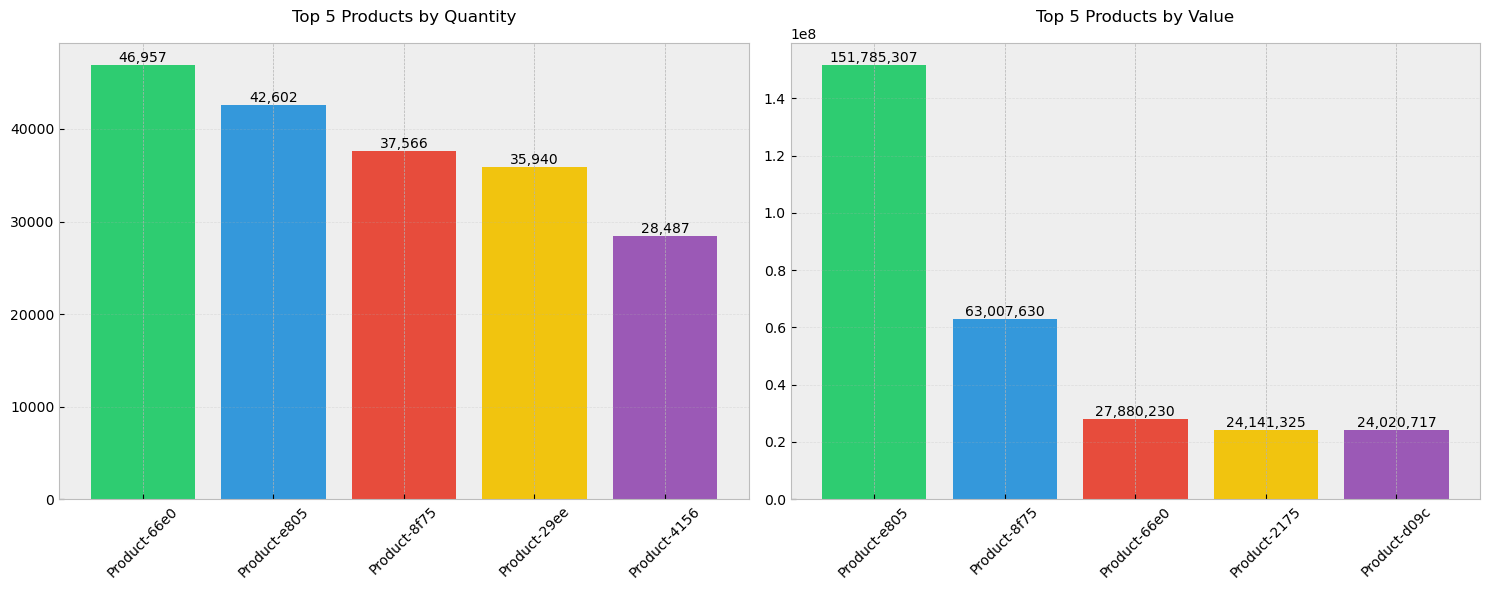


Top 5 Products by Quantity:
                    QUANTITY        VALUE
ANONYMIZED PRODUCT                       
Product-66e0           46957   27880230.0
Product-e805           42602  151785307.0
Product-8f75           37566   63007630.0
Product-29ee           35940   16525466.0
Product-4156           28487   22910311.0

Top 5 Products by Value:
                    QUANTITY        VALUE
ANONYMIZED PRODUCT                       
Product-e805           42602  151785307.0
Product-8f75           37566   63007630.0
Product-66e0           46957   27880230.0
Product-2175           11985   24141325.0
Product-d09c           18081   24020717.0

Monthly Growth Rates:
Month-Year  Value_Growth  Quantity_Growth
2024-01-01           NaN              NaN
2024-02-01        -24.07           -34.75
2024-03-01         -6.62             2.99
2024-04-01         -3.08            11.40
2024-05-01         43.70            37.58
2024-06-01        -14.17           -12.70
2024-07-01         23.01            23.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
df = pd.read_csv("cleaned_case_study_data.csv")

# Set a clean, modern style
plt.style.use('bmh')  

# Convert DATE back to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set color palette
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f', '#9b59b6']

# 1. Time Series Analysis
monthly_sales = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).reset_index()

monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

# Create time series plots with enhanced styling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Value Trend
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         marker='o', color=colors[0], linewidth=2, markersize=8)
ax1.set_title('Monthly Sales Value Trend', fontsize=12, pad=15)
ax1.set_xlabel('Month', fontsize=10)
ax1.set_ylabel('Total Value', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Quantity Trend
ax2.plot(monthly_sales['Month-Year'], monthly_sales['QUANTITY'], 
         marker='o', color=colors[1], linewidth=2, markersize=8)
ax2.set_title('Monthly Sales Quantity Trend', fontsize=12, pad=15)
ax2.set_xlabel('Month', fontsize=10)
ax2.set_ylabel('Total Quantity', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Product Performance Analysis
top_quantity_products = df.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('QUANTITY', ascending=False)

top_value_products = df.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False)

# Visualize Top 5 Products with enhanced styling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Top 5 by Quantity
top_5_quantity = top_quantity_products.head()
bars1 = ax1.bar(range(5), top_5_quantity['QUANTITY'], color=colors)
ax1.set_title('Top 5 Products by Quantity', fontsize=12, pad=15)
ax1.set_xticks(range(5))
ax1.set_xticklabels(top_5_quantity.index, rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Top 5 by Value
top_5_value = top_value_products.head()
bars2 = ax2.bar(range(5), top_5_value['VALUE'], color=colors)
ax2.set_title('Top 5 Products by Value', fontsize=12, pad=15)
ax2.set_xticks(range(5))
ax2.set_xticklabels(top_5_value.index, rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed analysis with formatted output
print("\nTop 5 Products by Quantity:")
print(top_quantity_products[['QUANTITY', 'VALUE']].head().round(2).to_string())

print("\nTop 5 Products by Value:")
print(top_value_products[['QUANTITY', 'VALUE']].head().round(2).to_string())

# Monthly growth rates
monthly_sales['Value_Growth'] = monthly_sales['VALUE'].pct_change() * 100
monthly_sales['Quantity_Growth'] = monthly_sales['QUANTITY'].pct_change() * 100

print("\nMonthly Growth Rates:")
print(monthly_sales[['Month-Year', 'Value_Growth', 'Quantity_Growth']]
      .round(2)
      .to_string(index=False))

# Key insights with formatted numbers
print("\nKey Insights:")
print(f"Average monthly sales value: ${monthly_sales['VALUE'].mean():,.2f}")
print(f"Average monthly quantity: {monthly_sales['QUANTITY'].mean():,.0f} units")
print(f"Month with highest value: {monthly_sales.loc[monthly_sales['VALUE'].idxmax(), 'Month-Year'].strftime('%B %Y')}")
print(f"Month with highest quantity: {monthly_sales.loc[monthly_sales['QUANTITY'].idxmax(), 'Month-Year'].strftime('%B %Y')}")

# Seasonality analysis 
if len(monthly_sales) >= 12:
    print("\nSeasonality Analysis (Average by Month):")
    monthly_sales['Month'] = monthly_sales['Month-Year'].dt.strftime('%B')  # Month names instead of numbers
    seasonal_patterns = monthly_sales.groupby('Month')[['VALUE', 'QUANTITY']].mean()
    print(seasonal_patterns.round(2).to_string())

In [3]:
# Additional insights
print("\nKey Insights:")
print(f"Total number of categories: {len(category_analysis)}")
print(f"Total number of businesses: {len(business_analysis)}")
print(f"\nTop 5 categories account for {category_analysis['VALUE_PCT'].head().sum():.2f}% of total value")
print(f"Top 5 businesses account for {business_analysis['VALUE_PCT'].head().sum():.2f}% of total value")


Key Insights:


NameError: name 'category_analysis' is not defined

In [15]:
# First, let's see what columns we have
print("Available columns in the DataFrame:")
print(df.columns.tolist())

# Let's also look at a few rows to understand the data structure
print("\nFirst few rows of the data:")
print(df.head())

Available columns in the DataFrame:
['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY', 'VALUE', 'Month-Year']

First few rows of the data:
                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY   VALUE   Month-Year  
0       Business-de42       Location-1ba8         1   850.0  August 2024  
1       Business-de42       Location-1ba8         2  1910.0  August 2024  
2       Business-de42       Location-1ba8         1  3670.0  August 2024  
3       Business-de42       Location-1ba8         1  2605.0  August 2024  
4       Business-de42       Location-1ba


=== Sales Overview ===

Sales by Category:
                     QUANTITY        VALUE
ANONYMIZED CATEGORY                       
Category-76             71719  198499343.0
Category-75            151330  181554632.0
Category-120           169715  115506421.0
Category-119            68332   48102774.0
Category-77             28455   36277127.0
Category-91             20853   35729823.0
Category-100            76824   30783426.0
Category-85             22997   20550056.0
Category-101            19585   12227597.0
Category-121            14669   12183700.0
Category-94             23670    7956716.0
Category-92              6954    7514425.0
Category-78              9766    6562538.0
Category-95              4117    5718656.0
Category-84             11933    5045168.0
Category-106             6521    4566978.0
Category-110            10529    4215429.0
Category-83              2436    3508646.0
Category-111             6715    3385923.0
Category-107             2730    3228058.0
Category-1

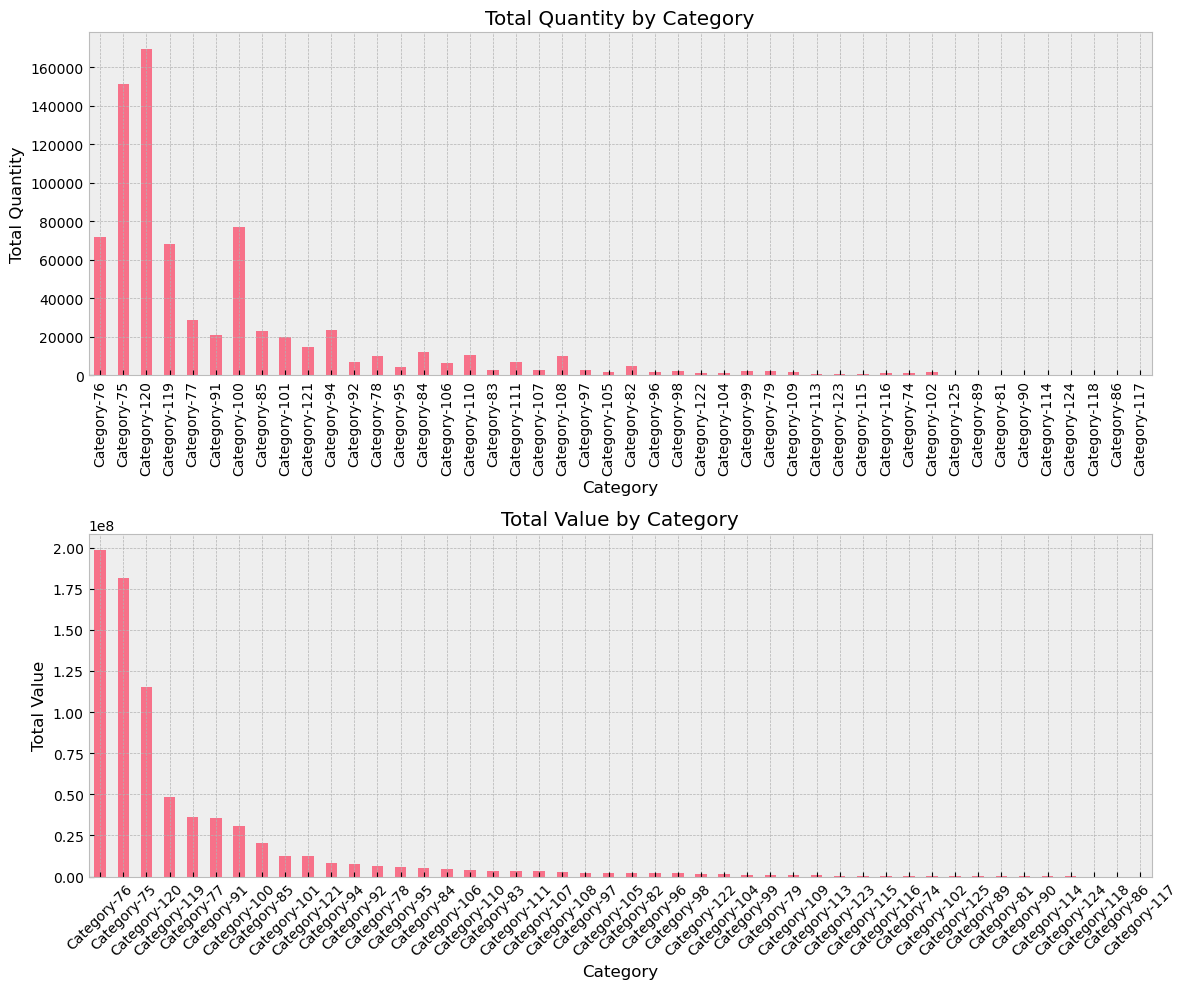


Sales by Business:
                     QUANTITY      VALUE
ANONYMIZED BUSINESS                     
Business-978e           13991  4976687.0
Business-0e5b            4289  4374082.0
Business-e672            3242  3607209.0
Business-dbce            2458  3485759.0
Business-6068            8214  3407380.0
...                       ...        ...
Business-c19b               1       55.0
Business-8654               1       55.0
Business-4b87               5        2.0
Business-d78d               1        2.0
Business-f712              22        0.0

[4800 rows x 2 columns]


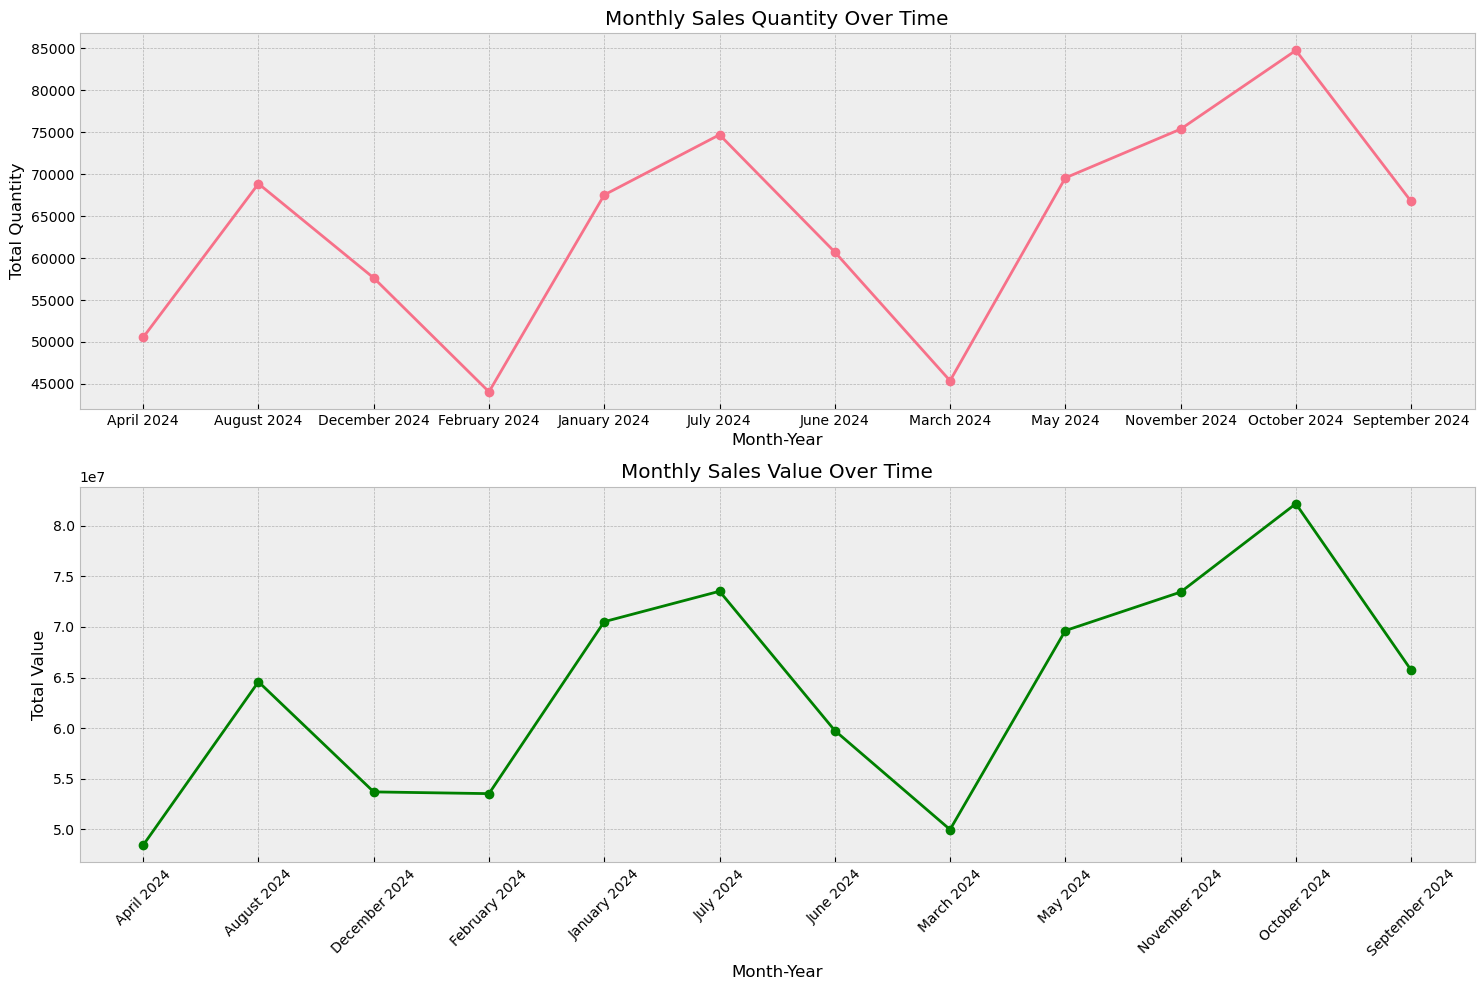


=== Top Products Analysis ===

Top 5 Products by Quantity:
                    QUANTITY
ANONYMIZED PRODUCT          
Product-66e0           46957
Product-e805           42602
Product-8f75           37566
Product-29ee           35940
Product-4156           28487


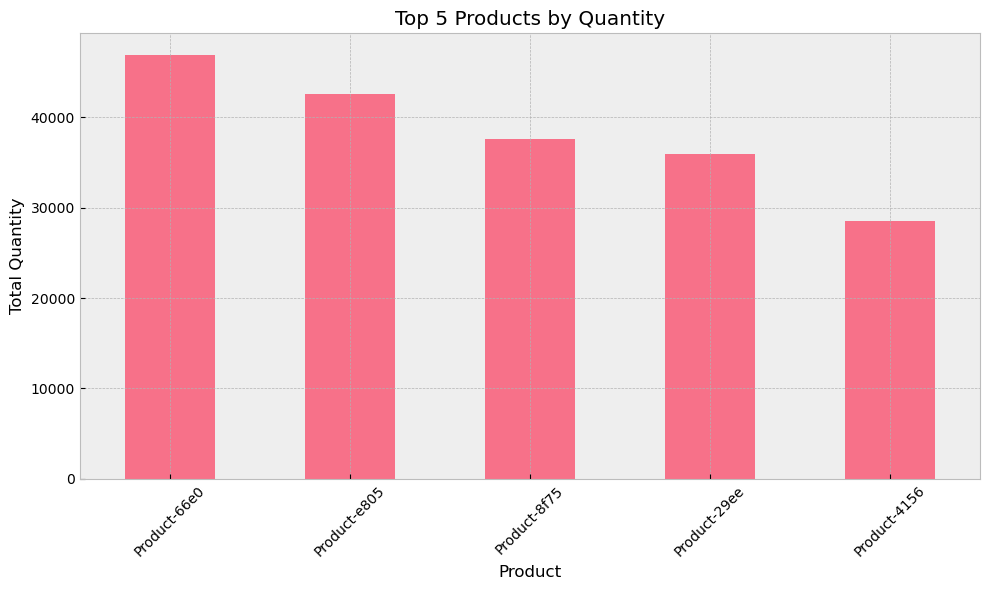


Top 5 Products by Value:
                          VALUE
ANONYMIZED PRODUCT             
Product-e805        151785307.0
Product-8f75         63007630.0
Product-66e0         27880230.0
Product-2175         24141325.0
Product-d09c         24020717.0


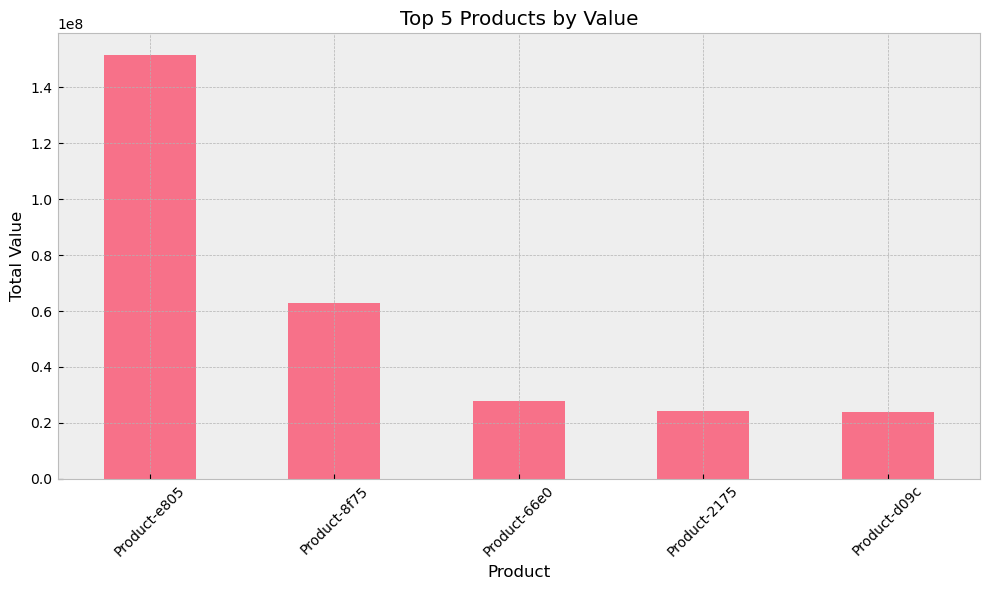

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('bmh') 
sns.set_palette("husl")

# 1. Sales Overview by Category and Business
print("\n=== Sales Overview ===")

# Group by Category
category_analysis = df.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False)

print("\nSales by Category:")
print(category_analysis)

# Visualize Category Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Category - Quantity
category_analysis['QUANTITY'].plot(kind='bar', ax=ax1)
ax1.set_title('Total Quantity by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Quantity')
plt.xticks(rotation=45)

# Category - Value
category_analysis['VALUE'].plot(kind='bar', ax=ax2)
ax2.set_title('Total Value by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by Business
business_analysis = df.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False)

print("\nSales by Business:")
print(business_analysis)



# 2. Time Series Analysis
# Time series already created (Month-Year column exists)
time_series = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).reset_index()

# Plot time series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Quantity over time
ax1.plot(time_series['Month-Year'], time_series['QUANTITY'], marker='o')
ax1.set_title('Monthly Sales Quantity Over Time')
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Total Quantity')
plt.xticks(rotation=45)

# Value over time
ax2.plot(time_series['Month-Year'], time_series['VALUE'], marker='o', color='green')
ax2.set_title('Monthly Sales Value Over Time')
ax2.set_xlabel('Month-Year')
ax2.set_ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top Products Analysis
print("\n=== Top Products Analysis ===")

# Top 5 products by Quantity
top_quantity = df.groupby('ANONYMIZED PRODUCT').agg({
    'QUANTITY': 'sum'
}).sort_values('QUANTITY', ascending=False).head()

print("\nTop 5 Products by Quantity:")
print(top_quantity)

# Visualize top products by quantity
plt.figure(figsize=(10, 6))
top_quantity['QUANTITY'].plot(kind='bar')
plt.title('Top 5 Products by Quantity')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 products by Value
top_value = df.groupby('ANONYMIZED PRODUCT').agg({
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False).head()

print("\nTop 5 Products by Value:")
print(top_value)

# Visualize top products by value
plt.figure(figsize=(10, 6))
top_value['VALUE'].plot(kind='bar')
plt.title('Top 5 Products by Value')
plt.xlabel('Product')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save analysis results to CSV files
category_analysis.to_csv('category_analysis.csv')
business_analysis.to_csv('business_analysis.csv')
time_series.to_csv('time_series_analysis.csv')
top_quantity.to_csv('top_products_quantity.csv')
top_value.to_csv('top_products_value.csv')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('bmh')
sns.set_palette("husl")

print("=== Sales Overview Analysis ===\n")

# 1. Sales by Category
print("1. Category Analysis")
category_analysis = df.groupby('ANONYMIZED CATEGORY').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False)

print("\nCategory Performance:")
print(category_analysis)

# Visualize Category Analysis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Category - Value
category_analysis['VALUE'].plot(kind='bar', ax=ax1)
ax1.set_title('Total Value by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Total Value ($)')
plt.xticks(rotation=45)

# Category - Quantity
category_analysis['QUANTITY'].plot(kind='bar', ax=ax2)
ax2.set_title('Total Quantity by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Business Analysis
print("\n2. Business Analysis")
business_analysis = df.groupby('ANONYMIZED BUSINESS').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).sort_values('VALUE', ascending=False)

print("\nTop 10 Businesses:")
print(business_analysis.head(10))

# Visualize Top 10 Businesses
plt.figure(figsize=(12, 6))
business_analysis.head(10)['VALUE'].plot(kind='bar')
plt.title('Top 10 Businesses by Value')
plt.xlabel('Business')
plt.ylabel('Total Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Time Series Analysis
print("\n3. Time Series Analysis")
monthly_sales = df.groupby('Month-Year').agg({
    'QUANTITY': 'sum',
    'VALUE': 'sum'
}).reset_index()

# Convert to datetime for proper sorting
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format='%B %Y')
monthly_sales = monthly_sales.sort_values('Month-Year')

# Plot time series
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Value trend
ax1.plot(monthly_sales['Month-Year'], monthly_sales['VALUE'], 
         marker='o', linewidth=2, markersize=8)
ax1.set_title('Monthly Sales Value Trend')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Value ($)')
plt.xticks(rotation=45)

# Quantity trend
ax2.plot(monthly_sales['Month-Year'], monthly_sales['QUANTITY'], 
         marker='o', linewidth=2, markersize=8)
ax2.set_title('Monthly Sales Quantity Trend')
ax2.set_xlabel('Month')
ax2.set_ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Product Performance Analysis
print("\n4. Product Performance Analysis")

# Top 5 by Quantity
print("\nTop 5 Products by Quantity:")
quantity_leaders = df.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().sort_values(ascending=False).head()
print(quantity_leaders)

# Top 5 by Value
print("\nTop 5 Products by Value:")
value_leaders = df.groupby('ANONYMIZED PRODUCT')['VALUE'].sum().sort_values(ascending=False).head()
print(value_leaders)

# Visualize top products
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top 5 by Quantity
quantity_leaders.plot(kind='bar', ax=ax1)
ax1.set_title('Top 5 Products by Quantity')
ax1.set_xlabel('Product')
ax1.set_ylabel('Total Quantity')
plt.xticks(rotation=45)

# Top 5 by Value
value_leaders.plot(kind='bar', ax=ax2)
ax2.set_title('Top 5 Products by Value')
ax2.set_xlabel('Product')
ax2.set_ylabel('Total Value ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save results to CSV
category_analysis.to_csv('category_analysis.csv')
business_analysis.head(10).to_csv('top_10_businesses.csv')
monthly_sales.to_csv('monthly_sales.csv')
pd.DataFrame({
    'Top_Products_Quantity': quantity_leaders,
    'Top_Products_Value': value_leaders
}).to_csv('top_products.csv')

=== Sales Overview Analysis ===

1. Category Analysis


NameError: name 'df' is not defined